<a href="https://colab.research.google.com/github/Gabrielnkl/notebooks/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahideseker/wine-quality-classification")

print("Path to dataset files:", path)

100%|██████████| 7.43k/7.43k [00:00<00:00, 5.76MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sahideseker/wine-quality-classification/versions/1


In [5]:
import pandas as pd

df = pd.read_csv(f"{path}/wine_quality_classification.csv")
df = df.dropna()
df.head()

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


In [31]:
df.std()

,0
fixed_acidity,3.452693
residual_sugar,4.208920
alcohol,1.760283
density,0.004300
quality_label,0.835796


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["quality_label"] = le.fit_transform(df["quality_label"])

X = df.drop("quality_label", axis=1)
y = df["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(le.classes_)

3

In [33]:
y_train.value_counts()

,count
quality_label,
2,288
0,272
1,240


In [34]:
y_train

,quality_label
29,1
535,0
695,2
557,2
836,0
...,...
106,2
270,2
860,0
435,1


In [38]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Create a model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(len(le.classes_), activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3087 - loss: 1.1594 - val_accuracy: 0.3550 - val_loss: 1.0908
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3595 - loss: 1.0980 - val_accuracy: 0.3100 - val_loss: 1.0962
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4090 - loss: 1.0894 - val_accuracy: 0.3300 - val_loss: 1.0984
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3891 - loss: 1.0939 - val_accuracy: 0.3650 - val_loss: 1.0949
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4094 - loss: 1.0809 - val_accuracy: 0.3350 - val_loss: 1.0966
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4199 - loss: 1.0863 - val_accuracy: 0.3750 - val_loss: 1.0957
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4362 - loss: 1.0801 - val_accuracy: 0.3850 - val_loss: 1.0942
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4496 - loss: 1.0738 - val_accuracy: 0.3750 - val_loss: 1

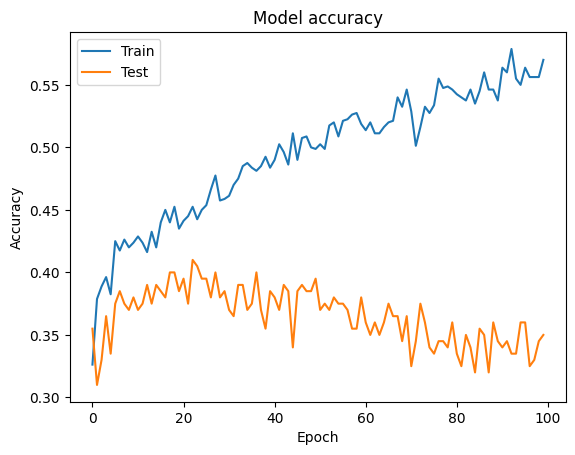

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [56]:
import sklearn.metrics as metrics

y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)

print(metrics.classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.38      0.35      0.36        71
           1       0.30      0.26      0.28        62
           2       0.36      0.43      0.39        67

    accuracy                           0.35       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.35      0.35      0.35       200



In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.325
